Start by creating a new `conda` environment:

```bash
$ conda create -n pyannote python=3.5 anaconda
$ source activate pyannote
```

Then, install `pyannote-video` and its dependencies:

```bash
$ conda install cmake
$ conda install gcc
$ conda install -c menpo ffmpeg=3.1.3
$ conda install opencv
$ conda install boost
$ pip install pyannote-video
```

Finally, download sample video and `dlib` models:

```bash
$ git clone https://github.com/pyannote/pyannote-data.git
$ git clone https://github.com/davisking/dlib-models.git
$ bunzip2 dlib-models/dlib_face_recognition_resnet_model_v1.dat.bz2
$ bunzip2 dlib-models/shape_predictor_68_face_landmarks.dat.bz2
```

To execute this notebook locally:
```bash
$ git clone https://github.com/pyannote/pyannote-video.git
$ jupyter notebook --notebook-dir="pyannote-video/doc"
```


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Shot segmentation

In [1]:
!pyannote-structure.py --help

Video structure

The standard pipeline for is the following:

    shot boundary detection ==> shot threading ==> segmentation into scenes

Usage:
  pyannote-structure.py shot [options] <video> <output.json>
  pyannote-structure.py thread [options] <video> <shot.json> <output.json>
  pyannote-structure.py scene [options] <video> <thread.json> <output.json>
  pyannote-structure.py (-h | --help)
  pyannote-structure.py --version

Options:
  --height=<n_pixels>    Resize video frame to height <n_pixels> [default: 50].
  --window=<n_seconds>   Apply median filtering on <n_seconds> window [default: 2.0].
  --threshold=<value>    Set threshold to <value> [default: 1.0].
  --min-match=<n_match>  Set minimum number of matches to <n_match> [default: 20].
  --lookahead=<n_shots>  Look at up to <n_shots> following shots [default: 24].
  -h --help              Show this screen.
  --version              Show version.
  --verbose              Show progress.


In [2]:
!pyannote-structure.py shot --verbose /home/buddha/thesis/pyannote-data/TheBigBangTheory.mkv /home/buddha/thesis/pyannote-data/TheBigBangTheory.shots.json

  0%|                                            | 0.00/752 [00:00<?, ?frames/s]Exception KeyError: KeyError(<weakref at 0x7f67d8ad9998; to 'tqdm' at 0x7f67d8adce10>,) in <bound method tqdm.__del__ of   0%|                                            | 0.00/752 [00:00<?, ?frames/s]> ignored
Traceback (most recent call last):
  File "/usr/local/bin/pyannote-structure.py", line 112, in <module>
    height=height, window=window, threshold=threshold)
  File "/usr/local/bin/pyannote-structure.py", line 67, in do_shot
    shots = Timeline(shots)
  File "/usr/local/lib/python2.7/dist-packages/pyannote/core/timeline.py", line 138, in __init__
    segments_set = set(segments)
  File "/usr/local/lib/python2.7/dist-packages/pyannote/video/structure/shot.py", line 120, in __iter__
    t, y = zip(*self.iter_dfd())
  File "/usr/local/lib/python2.7/dist-packages/pyannote/video/structure/shot.py", line 113, in iter_dfd
    yield t, self.dfd(previous, current, flow=None)
  File "/usr/local/lib/python2.7

Detected shot boundaries can be visualized using `pyannote.core` notebook support:

In [3]:
from pyannote.core.json import load_from
shots = load_from('/home/buddha/thesis/pyannote-data/TheBigBangTheory.shots.json')
shots

ModuleNotFoundError: No module named 'pyannote'

# Face processing

In [4]:
!pyannote-face.py --help

Face detection and tracking

The standard pipeline is the following

      face tracking => facial landmarks detection => feature extraction

Usage:
  pyannote-face track [options] <video> <shot.json> <output>
  pyannote-face landmarks [options] <video> <model> <tracking> <output>
  pyannote-face features [options] <video> <model> <landmark> <output>
  pyannote-face demo [options] <video> <tracking> <output>
  pyannote-face (-h | --help)
  pyannote-face --version

General options:

  -h --help                 Show this screen.
  --version                 Show version.
  --verbose                 Show processing progress.

Face tracking options (track):

  <video>                   Path to video file.
  <shot.json>               Path to shot segmentation result file.
  <output>                  Path to tracking result file.

  --min-size=<ratio>        Approximate size (in video height ratio) of the
                            smallest face that should be detected. Default is
          

### Face tracking

In [12]:
!pyannote-face.py track --verbose --every=0.5 /home/buddha/thesis/pyannote-data/TheBigBangTheory.mkv \
                                              /home/buddha/thesis/pyannote-data/TheBigBangTheory.shots.json \
                                              /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.txt

752frames [00:31, 24.2frames/s]                                                 


Face tracks can be visualized using `demo` mode:

In [13]:
!pyannote-face.py demo /home/buddha/thesis/pyannote-data/TheBigBangTheory.mkv \
                       /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.txt \
                       /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.mp4

[MoviePy] >>>> Building video /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.mp4
[MoviePy] Writing audio in TheBigBangTheory.trackTEMP_MPY_wvf_snd.mp3
100%|████████████████████████████████████████| 664/664 [00:00<00:00, 849.55it/s]
[MoviePy] Done.
[MoviePy] Writing video /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.mp4
100%|████████████████████████████████████████▉| 752/753 [00:08<00:00, 92.91it/s]
[MoviePy] Done.
[MoviePy] >>>> Video ready: /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.mp4 



In [21]:
import io
import base64
from IPython.display import HTML
video = io.open('/home/buddha/thesis/pyannote-data/TheBigBangTheory.track.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

### Facial landmarks and face embedding

In [15]:
!pyannote-face.py extract --verbose /home/buddha/thesis/pyannote-data/TheBigBangTheory.mkv \
                                    /home/buddha/thesis/pyannote-data/TheBigBangTheory.track.txt \
                                    /home/buddha/thesis/dlib-models/shape_predictor_68_face_landmarks.dat \
                                    /home/buddha/thesis/dlib-models/dlib_face_recognition_resnet_model_v1.dat \
                                    /home/buddha/thesis/pyannote-data/TheBigBangTheory.landmarks.txt \
                                    /home/buddha/thesis/pyannote-data/TheBigBangTheory.embedding.txt

752frames [00:43, 17.2frames/s]                                                 


### Face clustering

Once embeddings are extracted, let's apply face track hierarchical agglomerative clustering.  
The distance between two clusters is defined as the average euclidean distance between all embeddings.  

In [1]:
from pyannote.video.face.clustering import FaceClustering
clustering = FaceClustering(threshold=0.6)

In [2]:
face_tracks, embeddings = clustering.model.preprocess('/home/buddha/thesis/pyannote-data/TheBigBangTheory.embedding.txt')
print(vars(face_tracks))#.get_timeline()


{'_uri': None, 'modality': 'face', '_tracks': SortedDict({<Segment(6.36, 8.32)>: {0: 0}, <Segment(8.08, 10.32)>: {1: 1}, <Segment(8.44, 10.32)>: {2: 2}, <Segment(10.36, 12.64)>: {3: 3}, <Segment(12.68, 15.04)>: {4: 4}, <Segment(15.08, 17)>: {5: 5}, <Segment(15.44, 18.32)>: {6: 6}, <Segment(16.24, 16.6)>: {7: 7}, <Segment(16.36, 17.64)>: {8: 8}, <Segment(17.44, 18.08)>: {9: 9}, <Segment(19.8, 24.08)>: {10: 10}, <Segment(21.88, 24.08)>: {11: 11}, <Segment(21.96, 24.08)>: {12: 12}, <Segment(24.12, 26.12)>: {13: 13}, <Segment(26.16, 30)>: {14: 14, 15: 15}, <Segment(26.28, 26.72)>: {16: 16}, <Segment(26.56, 30)>: {17: 17}}), '_labels': {}, '_labelNeedsUpdate': {0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True, 10: True, 11: True, 12: True, 13: True, 14: True, 15: True, 16: True, 17: True}, '_timeline': None, '_timelineNeedsUpdate': True}


In [4]:
result = clustering(face_tracks, features=embeddings)
print(result)
distincts = []
for eachLabel in result.labels():
        x = list(embeddings.loc[embeddings['track'] == eachLabel].iloc[0,2:])
        distincts.append(x)
print(distincts)
sample_list = [[",".join([str(item) for item in sub])] for sub in distincts]


[ 00:00:06.360 -->  00:00:08.320] 0 9
[ 00:00:08.080 -->  00:00:10.320] 1 6
[ 00:00:08.440 -->  00:00:10.320] 2 9
[ 00:00:10.360 -->  00:00:12.640] 3 6
[ 00:00:12.680 -->  00:00:15.040] 4 9
[ 00:00:15.080 -->  00:00:17.000] 5 5
[ 00:00:15.440 -->  00:00:18.320] 6 6
[ 00:00:16.240 -->  00:00:16.600] 7 9
[ 00:00:16.360 -->  00:00:17.640] 8 9
[ 00:00:17.440 -->  00:00:18.080] 9 9
[ 00:00:19.800 -->  00:00:24.080] 10 9
[ 00:00:21.880 -->  00:00:24.080] 11 15
[ 00:00:21.960 -->  00:00:24.080] 12 6
[ 00:00:24.120 -->  00:00:26.120] 13 15
[ 00:00:26.160 -->  00:00:30.000] 14 9
[ 00:00:26.160 -->  00:00:30.000] 15 15
[ 00:00:26.280 -->  00:00:26.720] 16 6
[ 00:00:26.560 -->  00:00:30.000] 17 6
[[-0.09845, 0.11903, 0.04192, -0.058820000000000004, -0.01907, -0.025689999999999998, 0.045860000000000005, -0.14328, 0.15408, 0.00629, 0.22934000000000002, -0.01908, -0.18241, -0.1321, 0.05885, 0.1136, -0.16310999999999998, -0.1474, -0.077, -0.03263, 0.02204, 0.03644, -0.006809999999999999, 0.03381, -0.

In [7]:
print(result.labels())

# iloc[row slicing, column slicing]
# we need to iterate it through for all the labels
x = list(embeddings.loc[embeddings['track'] == result.labels()[0]].iloc[0,2:])


[15, 5, 6, 9]
[-0.09845, 0.11903, 0.04192, -0.058820000000000004, -0.01907, -0.025689999999999998, 0.045860000000000005, -0.14328, 0.15408, 0.00629, 0.22934000000000002, -0.01908, -0.18241, -0.1321, 0.05885, 0.1136, -0.16310999999999998, -0.1474, -0.077, -0.03263, 0.02204, 0.03644, -0.006809999999999999, 0.03381, -0.10848, -0.27485, -0.09826, -0.14977000000000001, 0.1026, -0.01733, 0.03676, 0.03003, -0.20692, -0.03735, 0.028260000000000004, -0.02035, -0.04183, -0.01499, 0.12963, 0.01804, -0.17739000000000002, -0.08321, 0.02947, 0.19255999999999998, 0.20210999999999998, -0.0069, 0.01709, -0.08649, -0.00118, -0.13527, 0.03971, 0.14424, 0.16749, 0.09875, 0.035089999999999996, -0.15927, 0.01838, 0.025910000000000002, -0.18112, 0.027389999999999998, 0.06184, -0.03957, -0.07862000000000001, -0.02335, 0.19965, 0.05479, -0.0845, -0.18344000000000002, 0.15175999999999998, -0.14072, -0.07683, 0.08495, -0.11505, -0.14239000000000002, -0.24043, 0.01902, 0.34010999999999997, 0.09243, -0.25961, 0.02

In [11]:
import csv
with open('2.csv', 'a') as f_csv:
    writer = csv.writer(f_csv, delimiter=',', dialect='excel',quoting =csv.QUOTE_NONE, quotechar='',escapechar=' ')
    writer.writerows(sample_list)
     
print("Writing complete")



Writing complete


In [20]:
import numpy as np

d = 64                           # dimension
nb = 100000                      # database size
nq = 10000                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

xb

array([[1.91519454e-01, 6.22108757e-01, 4.37727749e-01, ...,
        6.24916732e-01, 4.78093803e-01, 1.95675179e-01],
       [3.83317441e-01, 5.38736843e-02, 4.51648414e-01, ...,
        1.51395261e-01, 3.35174650e-01, 6.57551765e-01],
       [7.53425434e-02, 5.50063960e-02, 3.23194802e-01, ...,
        3.44416976e-01, 6.40880406e-01, 1.26205325e-01],
       ...,
       [1.00811470e+02, 5.90245306e-01, 7.98893511e-01, ...,
        3.39859009e-01, 3.01949501e-01, 8.53854537e-01],
       [1.00669464e+02, 9.16068792e-01, 9.55078781e-01, ...,
        5.95364332e-01, 3.84918079e-02, 1.05637990e-01],
       [1.00855637e+02, 5.91134131e-01, 6.78907931e-01, ...,
        2.18976989e-01, 6.53015897e-02, 2.17538327e-01]], dtype=float32)

In [1]:
from numpy import genfromtxt
t = genfromtxt('pplList.csv', delimiter=',')


In [8]:
result.chart()

[(9, 16.159999999999997), (6, 13.239999999999998), (15, 8.04), (5, 1.92)]

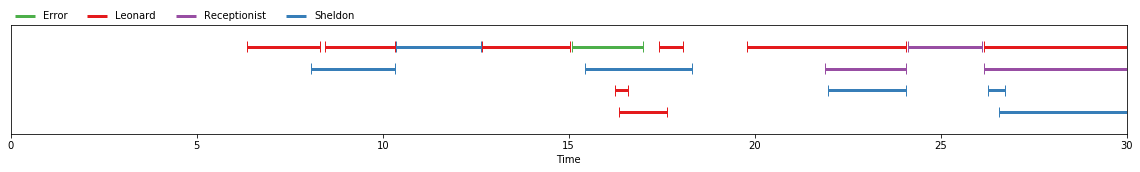

In [7]:
from pyannote.core import notebook, Segment
notebook.reset()
notebook.crop = Segment(0, 30)
mapping = {9: 'Leonard', 6: 'Sheldon', 15: 'Receptionist', 5: 'Error'}
result = result.rename_labels(mapping=mapping)
result

In [12]:
for _, track_id, cluster in result.itertracks(yield_label=True):
    print(_,track_id, cluster)

[ 00:00:06.360 -->  00:00:08.320] 0 9
[ 00:00:08.080 -->  00:00:10.320] 1 6
[ 00:00:08.440 -->  00:00:10.320] 2 9
[ 00:00:10.360 -->  00:00:12.640] 3 6
[ 00:00:12.680 -->  00:00:15.040] 4 9
[ 00:00:15.080 -->  00:00:17.000] 5 5
[ 00:00:15.440 -->  00:00:18.320] 6 6
[ 00:00:16.240 -->  00:00:16.600] 7 9
[ 00:00:16.360 -->  00:00:17.640] 8 9
[ 00:00:17.440 -->  00:00:18.080] 9 9
[ 00:00:19.800 -->  00:00:24.080] 10 9
[ 00:00:21.880 -->  00:00:24.080] 11 15
[ 00:00:21.960 -->  00:00:24.080] 12 6
[ 00:00:24.120 -->  00:00:26.120] 13 15
[ 00:00:26.160 -->  00:00:30.000] 14 9
[ 00:00:26.160 -->  00:00:30.000] 15 15
[ 00:00:26.280 -->  00:00:26.720] 16 6
[ 00:00:26.560 -->  00:00:30.000] 17 6


# Query images:

<tr>
    <td> <img src="images/leonard.jpg" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="images/sheldon.jpg"  alt="Drawing" style="width: 250px;"/> </td>
</tr>